# Importo lo que necesito

In [11]:
import numpy as np
import pandas as pd
import nltk 
import re

In [2]:
df= pd.read_excel('./Similitudes y diferencias.xlsx', header= 0)

In [3]:
df=df.drop (columns='Se necesita ley para esto?')

In [4]:
#convertir todas las que son str lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [5]:
df.head()

,Detalle,Proyecto DiTella final,Proyecto K,Proyecto JxC
0,objeto y ámbito de aplicación,la presente ley tiene por objeto crear un marc...,la presente ley tiene por objeto crear un marc...,la presente ley tiene por objeto crear un marc...
1,pricipios,las transacciones y operaciones de criptoactiv...,las transacciones y operaciones de criptoactiv...,las transacciones y operaciones de criptoactiv...
2,definiciones,"a los efectos de la presente ley, se entenderá...","a los efectos de la presente ley, se entenderá...",NaN
3,3.1 criptoactivos:,representación digital de valor en tanto activ...,representación digital de valor en tanto activ...,representación digital de valor en tanto activ...
4,banco de prueba de software o sandbox:,entorno de prueba. espacios de desarrollo que ...,entorno de prueba. espacios de desarrollo que ...,sandbox regulatorio: espacio de pruebas contro...


# Proyecto Diputada Schiwdt

In [6]:
df_K= df[['Detalle', 'Proyecto K']].copy()
df_K.head()

,Detalle,Proyecto K
0,objeto y ámbito de aplicación,la presente ley tiene por objeto crear un marc...
1,pricipios,las transacciones y operaciones de criptoactiv...
2,definiciones,"a los efectos de la presente ley, se entenderá..."
3,3.1 criptoactivos:,representación digital de valor en tanto activ...
4,banco de prueba de software o sandbox:,entorno de prueba. espacios de desarrollo que ...


In [7]:
df_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Detalle     37 non-null     object
 1   Proyecto K  41 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes


In [8]:
df_K.isna().sum()

Detalle       6
Proyecto K    2
dtype: int64

In [9]:
df_K['Detalle']=df_K['Detalle'].fillna("0")
df_K['Proyecto K']=df_K['Proyecto K'].fillna("0")

In [12]:
##convertir esto en una lista de palabras a eliminar.
filtrar = ['presente', 'ley']
df_K['Proyecto K'] = df_K['Proyecto K'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df_K['Proyecto K'] = df_K['Proyecto K'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_K['Proyecto K'] = df_K['Proyecto K'].apply(lambda x: ' '.join ([word for word in x.split() if len(word)>3]))

In [13]:
import matplotlib.pyplot as plt

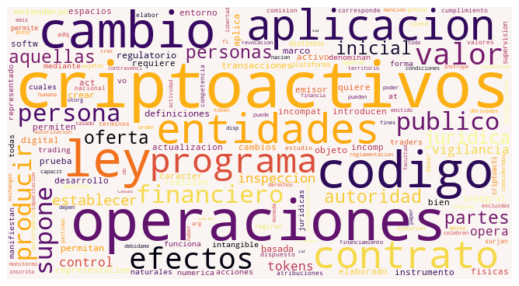

In [14]:
df_Kw = df_K [["Proyecto K"]].copy()
df_K.reset_index(drop=True, inplace=True)
df_K.shape

texto = df_Kw[df_Kw ['Proyecto K'].notnull()]['Proyecto K'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Proyecto Diputado Torres

In [15]:
df_pro= df[['Detalle', 'Proyecto JxC']].copy()
df_pro.head()

,Detalle,Proyecto JxC
0,objeto y ámbito de aplicación,la presente ley tiene por objeto crear un marc...
1,pricipios,las transacciones y operaciones de criptoactiv...
2,definiciones,NaN
3,3.1 criptoactivos:,representación digital de valor en tanto activ...
4,banco de prueba de software o sandbox:,sandbox regulatorio: espacio de pruebas contro...


In [16]:
df_pro.isna().sum()

Detalle          6
Proyecto JxC    26
dtype: int64

In [17]:
df_pro['Detalle']=df_pro['Detalle'].fillna("0")
df_pro['Proyecto JxC']=df_pro['Proyecto JxC'].fillna("0")

In [18]:
df_pro["Proyecto JxC"] = df_pro["Proyecto JxC"].replace("criptoactiv", "criptoactivos") 

In [19]:
#convertir esto en una lista de palabras a eliminar.
filtrar = ['presente', 'ley']
df_pro['Proyecto JxC'] = df_pro['Proyecto JxC'].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))

#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df_pro['Proyecto JxC'] = df_pro['Proyecto JxC'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df_pro['Proyecto JxC'] = df_pro['Proyecto JxC'].apply(lambda x: ' '.join ([word for word in x.split() if len(word)>3]))

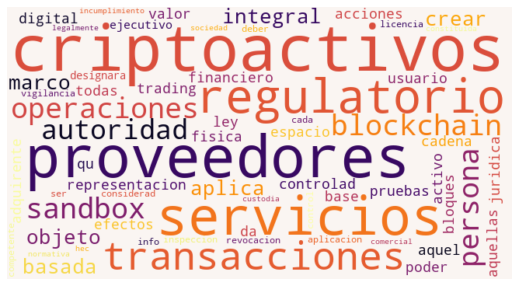

In [20]:
df_Prow = df_pro [["Proyecto JxC"]].copy()
df_Prow.reset_index(drop=True, inplace=True)
df_Prow.shape

texto = df_Prow[df_Prow ['Proyecto JxC'].notnull()]['Proyecto JxC'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=False).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Benchmark - Satoshi-s whitepaper

In [21]:
df_btc= pd.read_excel('./btc_paper.xlsx', header=None)

In [22]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1 non-null      object
dtypes: object(1)
memory usage: 136.0+ bytes


In [23]:
#convertir todas las que son str lowercase
df_btc = df_btc.applymap(lambda s:s.lower() if type(s) == str else s)
#eliminar los simbolos
df_btc[0] = [re.sub("[\W+]",' ', str(x)) for x in df_btc[0]]
#unifico palabra
df_btc[0] = df_btc[0].astype(str)
df_btc[0] = df_btc[0].replace("transacción", "transacciones") 
df_btc[0] = df_btc[0].replace("transaccion", "transacciones") 
##convertir esto en una lista de palabras a eliminar.
filtrar = ['ley', 'presente']
df_btc[0] = df_btc[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (filtrar)]))
#eliminamos las stopwords
stopwords = nltk.corpus.stopwords.words('spanish')
df_btc[0] = df_btc[0].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
## Eliminamos las palabras de menos de 2 letras
df_btc[0] = df_btc[0].apply(lambda x: ' '.join([word for word in x.split() if len(word)>3])) 

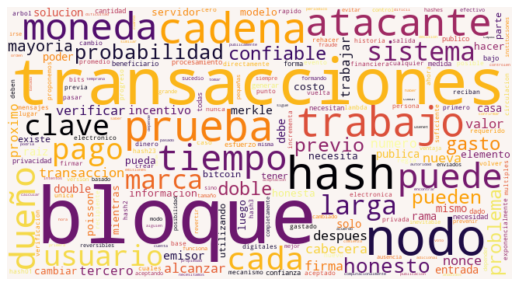

In [25]:
df_btc = df_btc.copy()
df_btc.reset_index(drop=True, inplace=True)
df_btc.shape

texto = df_btc[df_btc.notnull()].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)
texto = texto.translate(trans)
texto = re.sub('_', ' ', texto)

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color='#faf5f2', width=650, height=350, max_font_size=100, max_words=220, colormap="inferno", collocations=False,  normalize_plurals=True).generate(texto)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()